In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from rff.layers import GaussianEncoding

Using Scenario A1, 15s dataset for classifcation on class1 variable

In [2]:
df = pd.read_csv(r"C:\Users\smbm2\projects\research\csv_datasets\Scenario A1\TimeBasedFeatures-Dataset-15s-VPN.csv")

df.head()

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,Non-VPN
1,1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,Non-VPN
2,2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,Non-VPN
3,3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,Non-VPN
4,4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,Non-VPN


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,Non-VPN
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,Non-VPN
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,Non-VPN
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,Non-VPN
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,Non-VPN


In [4]:
le = LabelEncoder()
df['class1'] = le.fit_transform(df['class1'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,0


In [5]:
df['class1'].value_counts()

1    9793
0    8965
Name: class1, dtype: int64

In [6]:
df.isna().any()

duration              False
total_fiat            False
total_biat            False
min_fiat              False
min_biat              False
max_fiat              False
max_biat              False
mean_fiat             False
mean_biat             False
flowPktsPerSecond     False
flowBytesPerSecond    False
min_flowiat           False
max_flowiat           False
mean_flowiat          False
std_flowiat           False
min_active            False
mean_active           False
max_active            False
std_active            False
min_idle              False
mean_idle             False
max_idle              False
std_idle              False
class1                False
dtype: bool

In [7]:
class vpnDataset(Dataset):
    def __init__(self, df, target = 'class1'):
        self.n = df.shape[0]
        
        self.y = df[target].astype(np.float32).values

        self.x = df.drop(columns=[target]).astype(np.float32).values

    def __len__(self):
        return self.n
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]


In [8]:
vpn_dataset = vpnDataset(df)

In [9]:
len(vpn_dataset)

18758

In [10]:
vpn_dataset[:5]

(array([[9.36871100e+06, 1.60000000e+01, 4.00000000e+00, 1.56481800e+06,
         1.54937300e+06, 1.90205281e+05, 2.03290453e+05, 3.89822406e+05,
         3.70323719e+05, 1.03536119e+01, 4.80268848e+03, 4.00000000e+00,
         1.52308800e+06, 9.75907422e+04, 2.67600188e+05, 1.87148800e+06,
         1.98365638e+06, 2.19508900e+06, 1.83219703e+05, 1.23488300e+06,
         1.42056500e+06, 1.52308800e+06, 1.61096547e+05],
        [7.34023800e+06, 1.80000000e+01, 4.00000000e+00, 1.56755400e+06,
         1.52789300e+06, 1.65686984e+05, 1.86914844e+05, 3.17267562e+05,
         3.04370656e+05, 1.15800056e+01, 4.34018604e+03, 4.00000000e+00,
         1.51777400e+06, 8.73837891e+04, 2.21462859e+05, 1.49162700e+06,
         3.57243300e+06, 5.65323900e+06, 2.94270400e+06, 1.13149800e+06,
         1.32463600e+06, 1.51777400e+06, 2.73138375e+05],
        [4.64422500e+06, 2.90000000e+01, 1.50000000e+01, 1.27054700e+06,
         1.07997400e+06, 1.65865172e+05, 1.95302125e+05, 3.29473125e+05,
        

In [11]:
train_size = int(0.7*len(vpn_dataset))
print(train_size)
test_size = len(vpn_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(vpn_dataset, [train_size, test_size])
print(len(train_dataset), len(test_dataset))

13130
13130 5628


In [79]:
batch_sz = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_sz, shuffle=False)

In [13]:
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    # `inputs` will contain the input features for the current batch
    # `targets` will contain the corresponding target labels

    # Print the batch index and the sizes of inputs and targets
    print(f"Batch Index: {batch_idx}")
    print("Input sizes:", inputs.size())
    print("Target sizes:", targets.size())

    # You can also print the actual data if you want to see the values
    print("Inputs:")
    print(inputs)
    print("Targets:")
    print(targets)

Batch Index: 0
Input sizes: torch.Size([128, 23])
Target sizes: torch.Size([128])
Inputs:
tensor([[ 5.9843e+05,  2.4000e+01,  3.1000e+01,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4991e+07,  1.1000e+01,  1.4000e+01,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4980e+07,  2.0100e+02,  1.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        ...,
        [ 6.8100e+02,  6.8100e+02, -1.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4909e+07,  1.3700e+02,  6.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4976e+07,  2.9000e+01,  9.0000e+00,  ...,  3.3496e+06,
          7.1271e+06,  3.2733e+06]])
Targets:
tensor([1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 1

data is prepared. Now for the model

In [80]:
class vpnClassifier(nn.Module):
    def __init__(self, n_features, batches):
        super().__init__()

        self.batches = batches
        self.embeddings = nn.ModuleList([GaussianEncoding(sigma = 2, input_size=1, encoded_size=10) 
                                         for k in range(n_features)])
        
        
        
        self.drop = nn.Dropout(p=0.5)
        self.bn1 = nn.BatchNorm1d(460)
        self.lin1 = nn.Linear(460, 200)
        self.bn2 = nn.BatchNorm1d(200)
        self.lin2 = nn.Linear(200, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.initialize_weights()

    def initialize_weights(self):
        torch.nn.init.kaiming_normal_(self.lin1.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin1.bias)

        torch.nn.init.kaiming_normal_(self.lin2.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin2.bias)
        
    def forward(self, x):
        x = x.unsqueeze(2)
        x_list = []
        for i, e in enumerate(self.embeddings):
            # print(x[:, i,:].shape)
            x_i = e(x[:, i,:])
            # print(x_i.shape)
            x_list.append(x_i)
            
        x = torch.cat(x_list, dim=1)
        # print(x)
        # print(x.shape)
        x = self.drop(x)

        x = self.bn1(x)
        x = self.lin1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.bn2(x)
        x = self.lin2(x)
        x = self.sigmoid(x)
        # print(x)
        # print(x.shape)
        # print(x.squeeze())
        # print(x.shape)
        return x.squeeze(1)


In [87]:
model = vpnClassifier(n_features=23,batches=8)

In [88]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [65]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # print(batch_idx, inputs, targets)
        pred = model(inputs)
        # print(pred)
        # print(pred.squeeze(0))
        loss = loss_fn(pred, targets)
        total_loss+= loss.item()

        # Calculate accuracy
        predicted_labels = (pred>0.5).float()
        # print(predicted_labels)
        total_correct += (predicted_labels == targets).sum().item()
        # print(total_correct)
        total_samples += targets.size(0)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_loss = total_loss/len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy
    

def test(dataloader, model, loss_fn):
  model.eval()
  tot = 0
  total_correct = 0
  total_samples = 0
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(dataloader):
      #compute prediction error
      pred = model(inputs)
      test_loss = loss_fn(pred, targets)
      tot += test_loss

      # Calculate accuracy
      predicted_labels = (pred>0.5).float()
      # print(predicted_labels)
      total_correct += (predicted_labels == targets).sum().item()
      # print(total_correct)
      total_samples += targets.size(0)

  avg = tot/len(dataloader)
  accuracy = total_correct / total_samples

  return avg, accuracy

Epoch 1/50, Train Loss: 0.8853, Test Loss: 0.7133, Train Accuracy: 0.5074, Test Accuracy: 0.5213
Epoch 2/50, Train Loss: 0.8087, Test Loss: 0.6794, Train Accuracy: 0.5092, Test Accuracy: 0.5551
Epoch 3/50, Train Loss: 0.8284, Test Loss: 0.7067, Train Accuracy: 0.5101, Test Accuracy: 0.5235
Epoch 4/50, Train Loss: 0.8409, Test Loss: 0.7388, Train Accuracy: 0.5133, Test Accuracy: 0.5014
Epoch 5/50, Train Loss: 0.8762, Test Loss: 0.9135, Train Accuracy: 0.5196, Test Accuracy: 0.5219
Epoch 6/50, Train Loss: 0.8391, Test Loss: 0.6954, Train Accuracy: 0.5238, Test Accuracy: 0.6103
Epoch 7/50, Train Loss: 0.8289, Test Loss: 0.6459, Train Accuracy: 0.5340, Test Accuracy: 0.6423
Epoch 8/50, Train Loss: 0.8762, Test Loss: 0.9035, Train Accuracy: 0.5266, Test Accuracy: 0.5991
Epoch 9/50, Train Loss: 0.8246, Test Loss: 1.1063, Train Accuracy: 0.5392, Test Accuracy: 0.4762
Epoch 10/50, Train Loss: 0.8350, Test Loss: 1.3346, Train Accuracy: 0.5405, Test Accuracy: 0.4851
Epoch 11/50, Train Loss: 0.85

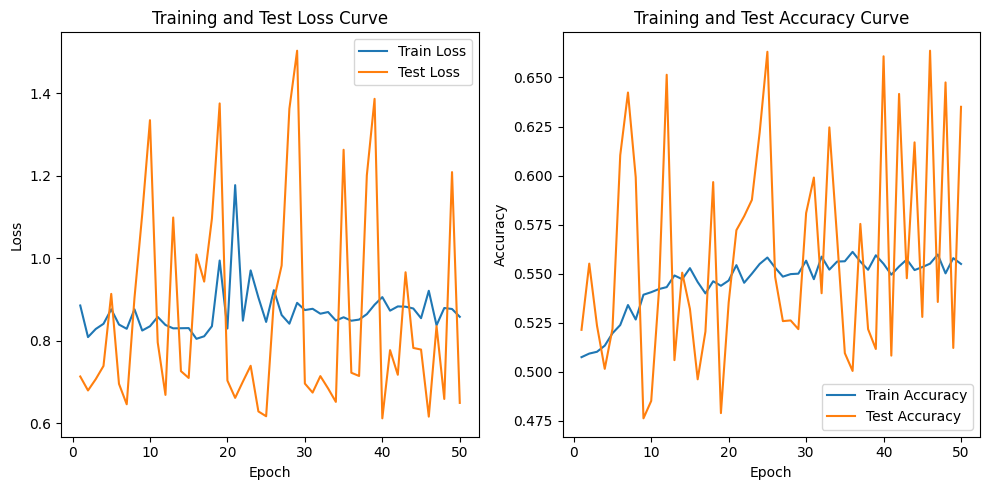

In [89]:
epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    # `inputs` will contain the input features for the current batch
    # `targets` will contain the corresponding target labels

    # Print the batch index and the sizes of inputs and targets
    print(f"Batch Index: {batch_idx}")
    # print("Input sizes:", inputs.size())
    # print("Target sizes:", targets.size())

    #running it through the model
    model(inputs)